# The Safest Neighborhood In Pittsburgh

![SAFE](https://media.giphy.com/media/QZtKnYQOHU2VMwmjqS/giphy.gif)

## Pittsburgh Police Arrest Data 

### Introduction 

Our group decided that the best neighborhood is determined by how safe the neighborhood is. Therefore, I looked at the Pittsburgh Police Arrest Data in order to see which neighborhood had the least number of arrests. Whichever neighborhood had the lowest number, would be the best neighborhood. 

### Analysis:

In [70]:
# I got the data onto my notebook
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

arrest = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")
arrestDF = pd.DataFrame(arrest)

arrestDF.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [71]:
# Counted the number of arrests in each neighborhood from the most to the least 
arrest["INCIDENTNEIGHBORHOOD"].value_counts()

Central Business District    3327
South Side Flats             2858
Carrick                      1966
East Allegheny               1781
Homewood South               1747
                             ... 
Regent Square                  28
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

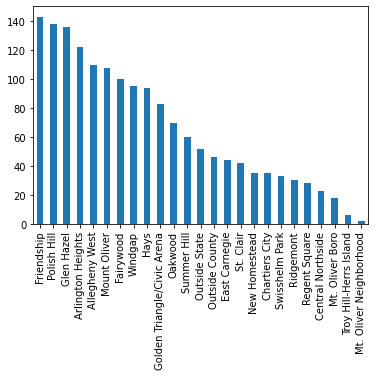

In [72]:
# created a bar graph that displayed the last 20 neighborhoods 
arrest["INCIDENTNEIGHBORHOOD"].value_counts().tail(25).plot(kind="bar")

I used the Incident Neighborhood column to determine which neighborhood was the safest. The bar graph shows that the neighborhood with the least number of arrests is Mt. Oliver Neighborhood and therefore it is the safest.

## Accidental Fatal Overdoses in Pittsburgh

### Introduction

Continuing with the theme of safety, I decided to go with the data that counts the accidental fatal overdoses in Pittsburgh. While this data doesn't state the neighborhoods where the overdoses took place, it does state the zip codes, and by manually connecting the zip codes to their neighborhoods, I can determine the safest neighborhood in this regard. 

In [73]:
# Getting the dataset from the csv file
overdoses = pd.read_csv("FatalOverdoses.csv")
overdoses.head(10)

,death_date_and_time,manner_of_death,age,sex,race,case_dispo,combined_od1,combined_od2,combined_od3,combined_od4,combined_od5,combined_od6,combined_od7,combined_od8,combined_od9,combined_od10,incident_zip,decedent_zip,case_year
0,2021-03-29T16:02:00,Accident,41,F,W,MO,Heroin,Fentanyl,Acetyl Fentanyl,Oxycodone,Phenobarbital,Etizolam,Trazodone,Clonazepam,Acetaminophen,NaN,15110,NaN,2021
1,2018-06-20T18:14:00,Accident,50,F,W,MO,Alcohol,Carfentanil,Citalopram/Escitalopram,Clonazepam,Cocaine,Diphenhydramine,Methadone,Mirtazapine,Para-FluoroisobutyrylFentanyl,NaN,15235,NaN,2018
2,2018-04-23T20:34:00,Accident,40,M,W,MO,Cocaine,Despropionyl Fentanyl 4-ANPP,Fentanyl,Heroin,Methadone,Methoxyacetyl Fentanyl,Nordiazepam,Para-FluoroisobutyrylFentanyl,Phenobarbital,NaN,15209,NaN,2018
3,2018-01-24T13:47:00,Accident,48,F,W,MO,Acetaminophen,Alcohol,Butalbital,Cyclobenzaprine,Despropionyl Fentanyl 4-ANPP,Dextromethorphan,Fentanyl,Hydrocodone,Tramadol,NaN,15227,NaN,2018
4,2017-04-18T13:37:00,Accident,54,M,W,MO,Carfentanil,Chlordiazepoxide,Diazepam,Fentanyl,Heroin,Oxazepam,Para-Fluorobutyryl Fentanyl/FIBF,Temazepam,Tramadol,NaN,15221,NaN,2017
5,2021-03-30T16:15:00,Accident,54,M,W,MO,Methadone,Buprenorphine,Citalopram,Estilopram,Clonazepam,Oxycodone,Hydrocodone,Tramadol,NaN,NaN,15215,NaN,2021
6,2016-11-16T11:00:00,Accidents,49,M,W,MO,Alcohol,Fentanyl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15126,NaN,2016
7,2016-11-15T17:48:00,Accident,26,M,W,MO,Fentanyl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15088,NaN,2016
8,2016-11-13T13:53:00,Accidents,19,M,W,MO,Fentanyl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15209,NaN,2016
9,2016-11-11T12:32:00,Accidents,49,M,B,MO,Fentanyl,Heroin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15219,NaN,2016


In [74]:
## Renaming the columns for readability and plotting the counts of overdoses by zip code
overdoses.rename(columns=({ 'incident_zip': 'Incident Zip', 'death_date_and_time': 'Count'}), inplace=True)
overdoses = overdoses.groupby("Incident Zip").count()

## Filtering out some of the zip codes as some of the overdoses occurred in neighborhoods outside of Pittsburgh 
overdoses1 = overdoses.filter(like = '151', axis = 0)
overdoses2 = overdoses.filter(like = '152', axis = 0)
overdoses3 = overdoses.filter(like = '153', axis = 0)
overdoses4 = pd.concat([overdoses1, overdoses2])
overdoses4 = pd.concat([overdoses4, overdoses3])

In [75]:
## Quick display of the counts of overdoses in each zip in acscending order

overdoses = overdoses4.iloc[0:, :1]
overdoses = overdoses[overdoses.Count > 21]
overdoses = overdoses.sort_values(by=["Count"], ascending=True)
overdoses.head(20)

,Count
Incident Zip,
15139,22
15129,23
15131,24
15241,27
15238,28
15116,29
15143,30
15228,34
15140,34


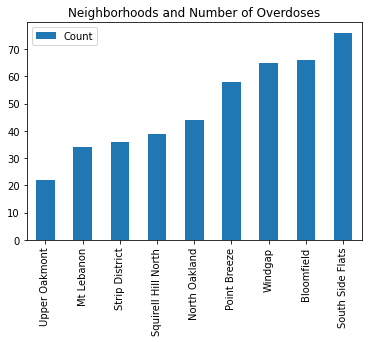

In [152]:
# A plot of this table with conversions to the neighborhoods
data = {'Count':[22, 34, 36, 39, 44, 58, 65, 66, 76]}
ov = pd.DataFrame(data, index = ["Upper Oakmont", "Mt Lebanon", "Strip District", "Squirell Hill North", "North Oakland", "Point Breeze", "Windgap", "Bloomfield", "South Side Flats"])
ov.plot(kind = "bar", title = "Neighborhoods and Number of Overdoses")

After looking at the zip codes with the fewest number of overdoses, I determined that Upper Oakmont had the smallest number with just 22. Utimately, in this regard, Upper Oakmont is the top neighborhood to live in. 

## Firearm Seizure Data

### Introduction

I chose the Firearm Seizure Data because of the extensive list of weaponry confiscated it includes and that it interests me. This can provide a unique perspective on the neighborhoods as this isn't something generally thought about when considering a neighborhood. It aligns with our overall theme of safety.

In [77]:
firearm = pd.read_csv("https://data.wprdc.org/datastore/dump/e967381d-d7e9-48e3-a2a2-39262f7fa5c4")
firearmDF = pd.DataFrame(firearm)

firearmDF.head()

,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
0,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
1,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
2,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
3,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
4,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN


In [78]:
# seeing how many neighborhoods are contained in the dataset
neighborhoods = []
for n in firearmDF["neighborhood"]:
    if n not in neighborhoods:
        neighborhoods.append(n)
len(neighborhoods)

89

From the dataset we can obtain useful information such as the neighborhood where the firearm was confiscated at, the type of firearm, and the year. By using the number of firearms collected per neighborhood, we can see which neighborhood is considered the safest. I will also break the data down by year and see if there are any significant changes throughout the years.

In [79]:
min(firearmDF["year"])

2015

In [80]:
max(firearmDF["year"])

2022

In [97]:
## Getting a table of the neighborhoods with the fewest number of firearm seizures

firearm = pd.read_csv("https://data.wprdc.org/datastore/dump/e967381d-d7e9-48e3-a2a2-39262f7fa5c4")
firearm.rename(columns=({ 'neighborhood': 'Neighborhood', 'total_count': 'Count'}), inplace=True)
firearm = firearm.groupby("Neighborhood").count()
firearm = firearm.iloc[0:, 1:2]
firearm = firearm.sort_values(by=["Count"], ascending=True)
firearm.head(20)

,Count
Neighborhood,
Swisshelm Park,1
Summer Hill,2
Regent Square,3
Friendship,3
Mt. Oliver,3
Chartiers City,4
St. Clair,4
Oakwood,4
West End,5


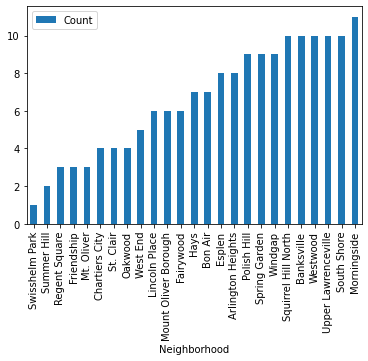

In [82]:
firearm = firearm.head(25)
firearm.plot(kind = 'bar')

After looking at the plot of the data, we can see that Swisshelm Park has the smallest number of firearm seizures with only 1 count. There are a few other neighborhoods with a small number as well, including Summer Hill, Regent Square, Friendship, and Mt. Oliver. 

## Conclusion

After looking through the three different data sets, we have come to the conclusion that Windgap is the top neighborhood in Pittsburgh, as it falls into one of the safest neighborhoods for all three categories analyzed. Overall, based on our data, it comes out to be the safest neighborhood to live in Pittsburgh. 